In [66]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

### Создадим датасет с данными частной медицинской клиники. 

In [67]:
# Создаём сэмпл
n_samples = 500

# Визиты к врачам (= количество принятых пациентов)
visits = np.random.choice(250, n_samples) # случайная выборка из значений заданного одномерного массива

# Дата отчета 
random_date = pd.date_range('5/16/2020', periods = n_samples, freq="D") # зададим дни начиная с сегодняшнего дня
# monthly_days = np.arange(1, n_samples)
# base_date = np.datetime64('2020-01-06')
# random_date = base_date + np.random.choice(monthly_days)

# Количество докторов, работающих в клинике в конкретный день 
number_of_doctors = np.random.choice(150, n_samples)

# Количество пациентов, которые обращались за медицинской помощью в городе (статистика по всем частным клиникам города)
number_of_patients = np.random.choice(150, n_samples) + 500

# Затраты на рекламу
advertising = np.random.choice(200, n_samples)

# Выручка в день
k = 1 + (advertising / n_samples) # сделаем коэффициент увеличение выручки от рекламы
sales = visits * k * 100

# Cоздаем датафрейм 
data = pd.DataFrame({'date': random_date,'number_of_doctors': number_of_doctors, 'visits': visits, 
                     'number_of_patients': number_of_patients,
                     'advertising': advertising, 'sales': sales})
data.head()

,date,number_of_doctors,visits,number_of_patients,advertising,sales
0,2020-05-16,8,232,576,120,28768.0
1,2020-05-17,77,151,608,143,19418.6
2,2020-05-18,97,132,544,58,14731.2
3,2020-05-19,37,183,625,140,23424.0
4,2020-05-20,128,18,634,133,2278.8


In [68]:
data.describe()

,number_of_doctors,visits,number_of_patients,advertising,sales
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,73.938000,125.732000,572.15400,101.108000,15143.744400
std,43.734467,73.489629,42.35415,58.773813,9037.192136
min,0.000000,1.000000,500.00000,0.000000,105.600000
25%,35.000000,60.000000,535.00000,49.500000,7013.000000
50%,77.000000,121.500000,573.50000,103.000000,14994.400000
75%,109.000000,191.250000,609.25000,151.000000,22600.350000
max,149.000000,249.000000,649.00000,199.000000,33761.000000


In [69]:
data.drop('date', axis = 1, inplace = True) # убираем колонку date для анализа данных
data.head()

,number_of_doctors,visits,number_of_patients,advertising,sales
0,8,232,576,120,28768.0
1,77,151,608,143,19418.6
2,97,132,544,58,14731.2
3,37,183,625,140,23424.0
4,128,18,634,133,2278.8


In [70]:
from sklearn.metrics import mean_absolute_error

X = data[['number_of_doctors', 'visits', 'number_of_patients', 'advertising']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['number_of_doctors', 'visits', 'number_of_patients', 'advertising']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ -1.02654266 119.9733273    0.81970365  25.58784913]
Bias: -2920.9744492063073
Error: 667.9751227926763


In [71]:
# убираем количество пациентов в городе, эти данные абсолютно не влияют на экономические показатели нашей клиники
data.drop('number_of_patients', axis = 1, inplace = True) 
data.head()

,number_of_doctors,visits,advertising,sales
0,8,232,120,28768.0
1,77,151,143,19418.6
2,97,132,58,14731.2
3,37,183,140,23424.0
4,128,18,133,2278.8


In [72]:
# несмотря на это показатель ошибки стал чуть больше
X = data[['number_of_doctors', 'visits', 'advertising']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['number_of_doctors', 'visits', 'advertising']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ -1.02777486 119.97696616  25.60978274]
Bias: -2454.5618049686746
Error: 667.708436584308


In [73]:
# пробуем то же самое, но на нормализованных данных

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

,0,1,2,3
0,0.053691,0.931452,0.603015,0.851643
1,0.516779,0.604839,0.718593,0.573846
2,0.651007,0.528226,0.291457,0.434569
3,0.248322,0.733871,0.703518,0.692858
4,0.859060,0.068548,0.668342,0.064572


In [74]:
# нормализация данных не дала никакого эффекта, если перевести Error в проценты в обоих вариантах, это можно увидеть
X = data_norm.iloc[:,:3]
y = data_norm.iloc[:,3:]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[-0.00455019  0.88408658  0.15142731]]
Bias: [-0.072505]
Error: 0.019839563237528238


### Добавим новый показатель затраты медицинской клиники, логично предположить чем больше компания инвестирует в медицинское оборудование и в персонал, тем выше продажи, так как все хотят идти к грамотному специалисту и лечиться по самым передовым стандартам

In [75]:
# для расчета сделаем следующее предположение
data['costs'] = data['visits'] * data['advertising']
data.head()

,number_of_doctors,visits,advertising,sales,costs
0,8,232,120,28768.0,27840
1,77,151,143,19418.6,21593
2,97,132,58,14731.2,7656
3,37,183,140,23424.0,25620
4,128,18,133,2278.8,2394


In [76]:
X = data[['number_of_doctors', 'visits', 'advertising', 'costs']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['number_of_doctors', 'visits', 'advertising', 'costs']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

# WIN -))

Weights: [-1.42923827e-13  1.00000000e+02 -1.67045386e-13  2.00000000e-01]
Bias: 8.003553375601768e-10
Error: 5.229143766882771e-10


In [77]:
# Поэксперементируем 
X = data[['costs']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['costs']])
print('Error, %: {}'.format(mean_absolute_error(pred_values, y) * 100 / data.sales.mean()))

# очень большая ошибка

Weights: [0.61981569]
Bias: 7177.425622232559
Error, %: 29.545049760675084


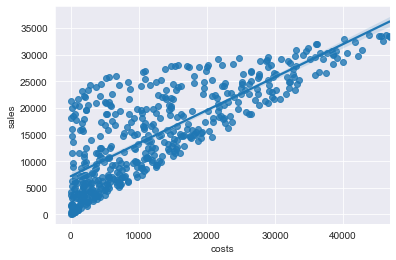

In [78]:
# построим визуализацию того, что казалось бы, должно работать
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = data['costs'], y = data['sales'], data=data, fit_reg=True)
plt.show()
# видим выбросы и их безумно много

In [79]:
# Попробуем с другим параметром
X = data[['visits']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['visits']])
print('Error, %: {}'.format(mean_absolute_error(pred_values, y) * 100 / data.sales.mean()))

# значительно меньше, чем в первом варианте, но с точки зрения практики, возможно это допустимая ошибка в данном значении

Weights: [120.68405288]
Bias: -30.102937259283863
Error, %: 8.646733735519714


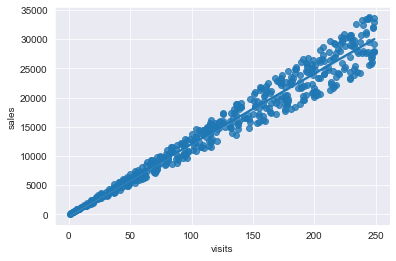

In [80]:
# построим визуализацию
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = data['visits'], y = data['sales'], data=data, fit_reg=True)
plt.show()